In [16]:
import numpy as np      
import pandas as pd       
import re
import matplotlib.pyplot as plt   
import seaborn as sns

from tqdm import tqdm

from konlpy.tag import Okt
okt = Okt()

import gensim


C:\Users\heian\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
train = pd.read_csv('open/news_train.csv')
test = pd.read_csv('open/news_test.csv')
submission = pd.read_csv('open/sample_submission.csv')

### 간단한 전처리 + 형태소 분석

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   n_id     118745 non-null  object
 1   date     118745 non-null  int64 
 2   title    118745 non-null  object
 3   content  118745 non-null  object
 4   ord      118745 non-null  int64 
 5   info     118745 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.4+ MB


In [49]:
print(train['date'].min())
print(train['date'].max())

20200101
20200630


In [50]:
print(test['date'].min())
print(test['date'].max())

20200101
20200630


In [56]:
print("진짜 뉴스 개수 : {}".format(len(train.loc[train['info']==0])))
print("가짜 뉴스 개수 : {}".format(len(train.loc[train['info']==1])))
print("진짜 뉴스 비율 : {}%".format(round((len(train.loc[train['info']==0])) / len(train.index) * 100, 3)))
print("가짜 뉴스 비율 : {}%".format(round((len(train.loc[train['info']==1])) / len(train.index) * 100, 3)))

진짜 뉴스 개수 : 71813
가짜 뉴스 개수 : 46932
진짜 뉴스 비율 : 60.477%
가짜 뉴스 비율 : 39.523%


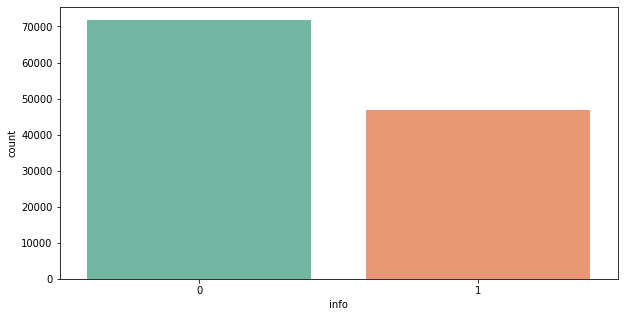

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x="info", palette="Set2")

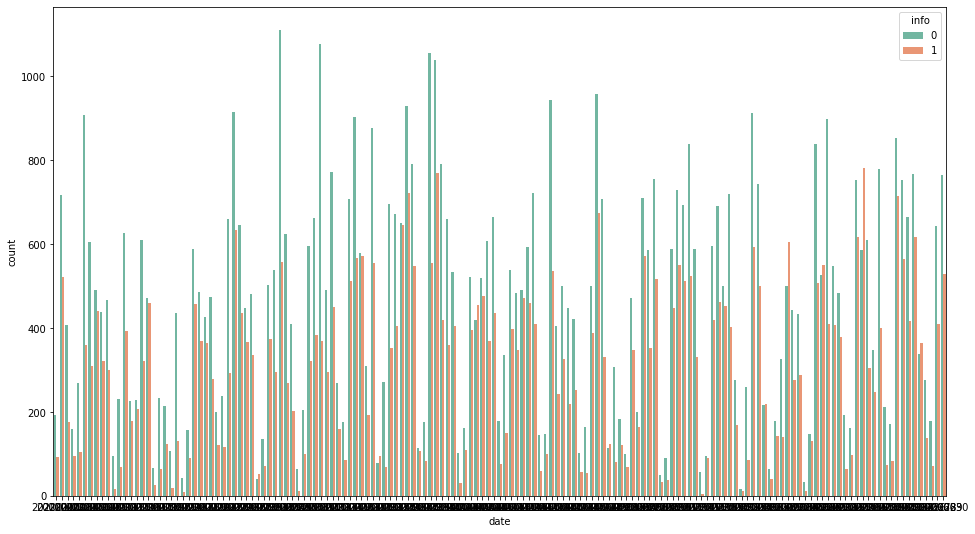

In [61]:
plt.figure(figsize=(16,9))
sns.countplot(data=train, x='date', hue='info', palette="Set2")

In [73]:
train['content_len'].max()

3469

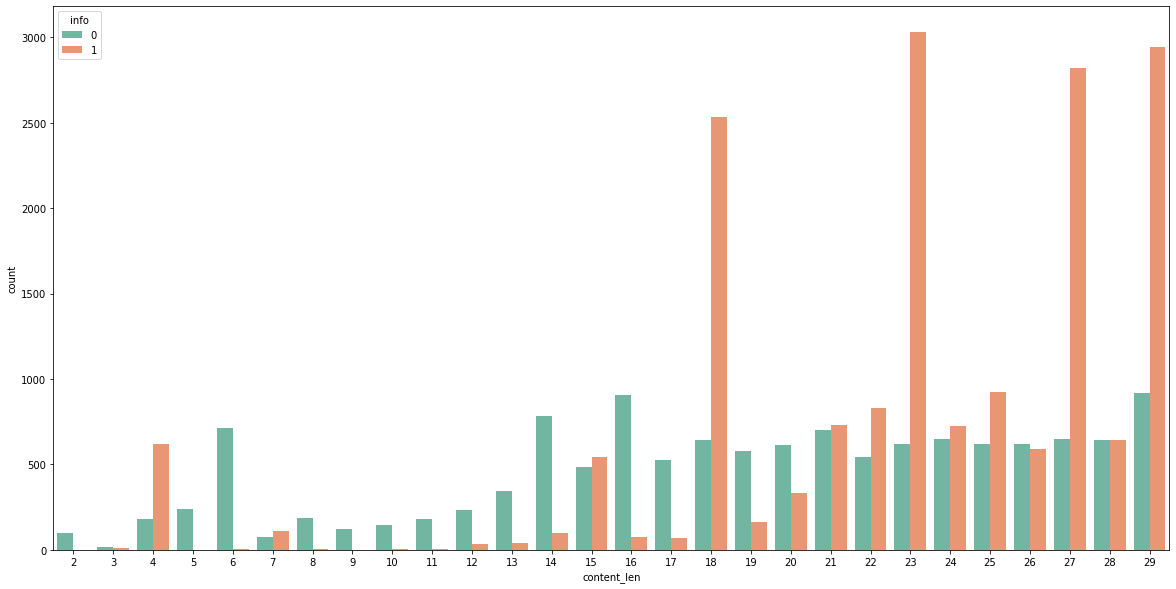

In [72]:
train['content_len'] = train['content'].apply(lambda x : len(x))
plt.figure(figsize=(20,10))
sns.countplot(data=graph, x='content_len', hue='info', palette="Set2")

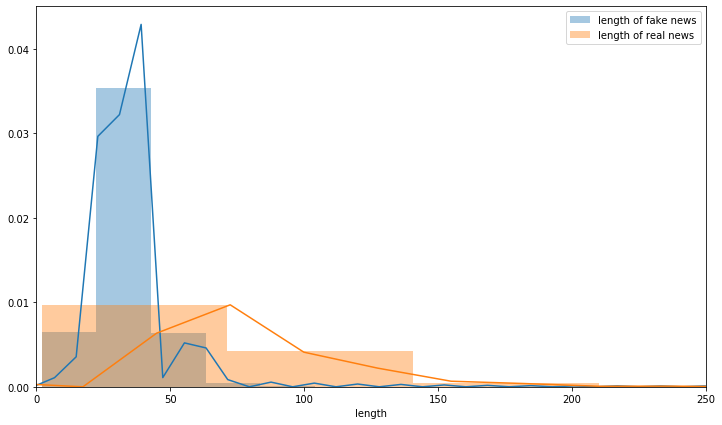

In [74]:
plt.figure(figsize=(12, 7))
fake = train.loc[train['info']==1]
real = train.loc[train['info']==0]
sns.distplot(fake['length'], label="length of fake news")
sns.distplot(real['length'], label="length of real news")
plt.xlim(0, 250)
plt.legend()

In [1]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null']
    tokenizer = Okt()
    
    for text in tqdm(text_list):
        txt = re.sub('[^가-힣a-z]', ' ', text.lower())
        token = tokenizer.morphs(txt)
        token = [t for t in token if t not in stopwords or type(t) != float]
        
    return token, tokenizer

train['token'], okt = text_preprocessing(train['content'])

### vectorization

In [ ]:
def text2sequence(train_text, max_len=1000):
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)
    train_X_seq = tokenizer.texts_to_sequences(train_text)
    vocab_size = len(tokenizer.word_index) + 1
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len)
    return X_train, vocab_size, tokenizer

train_y = train['info']
train_X, vocab_size, vectorizer = text2sequence(train['token'], max_len = 100)
print(train_X.shape, train_y.shape)

### Embedding

In [ ]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)
embedding_matrix = np.zeros((vocab_size, 300))

for index, word in enumerate(vocabulary):
    if word in word2vec
        embedding_vector = word2vec[word] 
        embedding_mxtrix[i] = embedding_vector 
    else:
        print("word2vec에 없는 단어입니다.")
        break